In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#matplotlib_inline

In [3]:
from pandas_datareader.data import DataReader as dr

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [7]:
for stock in tech_list:
    globals()[stock] = dr(stock,'yahoo',start,end)
    

In [8]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-18,55.712502,54.860001,55.264999,55.692501,101360000.0,55.145359
2019-09-19,55.939999,55.092499,55.502499,55.240002,88242400.0,54.697304
2019-09-20,55.639999,54.367500,55.345001,54.432499,221652400.0,53.897728
2019-09-23,54.959999,54.412498,54.737499,54.680000,76662000.0,54.142803
2019-09-24,55.622501,54.297501,55.257500,54.419998,124763200.0,53.885353


In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,80.287077,78.177559,79.207106,79.309872,1.397603e+08,78.990240
std,19.054897,18.234787,18.838470,18.613439,6.079619e+07,18.762714
min,54.959999,53.152500,54.607498,54.419998,4.661760e+07,53.885353
25%,66.484377,65.239378,65.743748,65.858126,9.841990e+07,65.406895
50%,75.924999,74.207500,75.023750,75.122501,1.260758e+08,74.696365
75%,89.067499,87.655624,88.200624,88.162498,1.662475e+08,88.003824
max,137.979996,130.529999,137.589996,134.179993,4.016932e+08,134.179993


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-09-18 to 2020-09-18
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


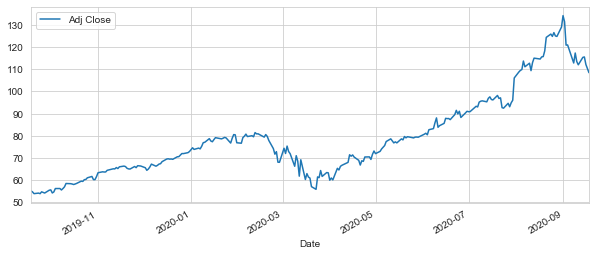

In [11]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

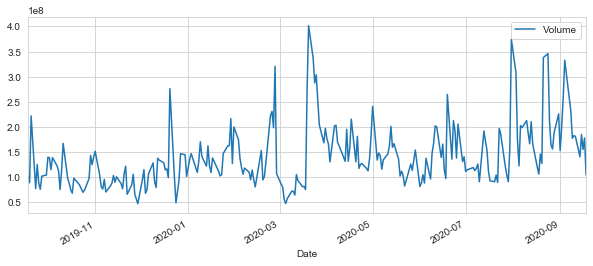

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [13]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

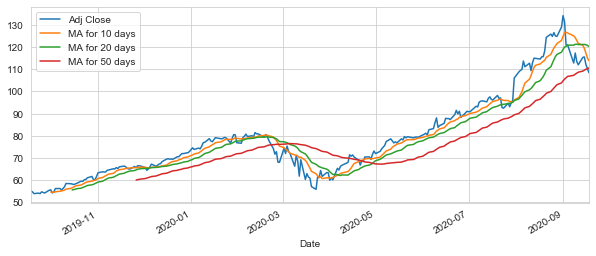

In [16]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(10,4))

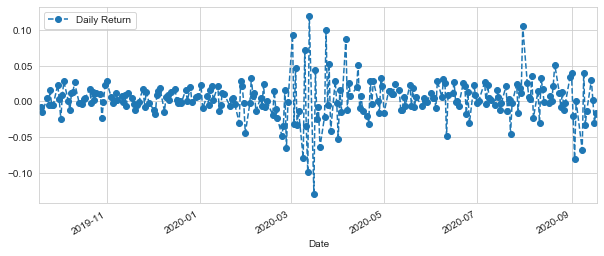

In [19]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

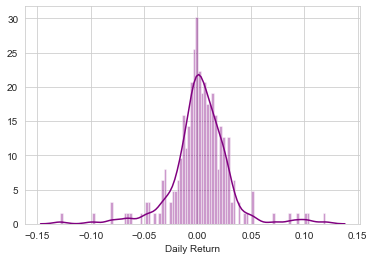

In [20]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

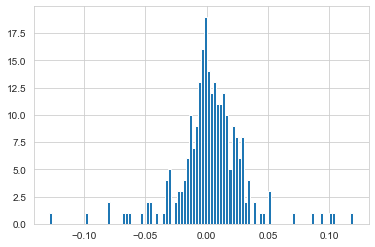

In [22]:
AAPL['Daily Return'].hist(bins=100)

In [23]:
closing_df = dr(tech_list,'yahoo',start,end)['Adj Close']

In [24]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-18,55.145359,1232.410034,136.960770,1817.459961
2019-09-19,54.697304,1238.709961,139.482071,1821.500000
2019-09-20,53.897728,1229.930054,137.870407,1794.160034
2019-09-23,54.142803,1234.030029,137.573776,1785.300049
2019-09-24,53.885353,1218.760010,135.833603,1741.609985


In [25]:
tech_rets = closing_df.pct_change()

In [26]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-18,NaN,NaN,NaN,NaN
2019-09-19,-0.008125,0.005112,0.018409,0.002223
2019-09-20,-0.014618,-0.007088,-0.011555,-0.015010
2019-09-23,0.004547,0.003334,-0.002152,-0.004938
2019-09-24,-0.004755,-0.012374,-0.012649,-0.024472


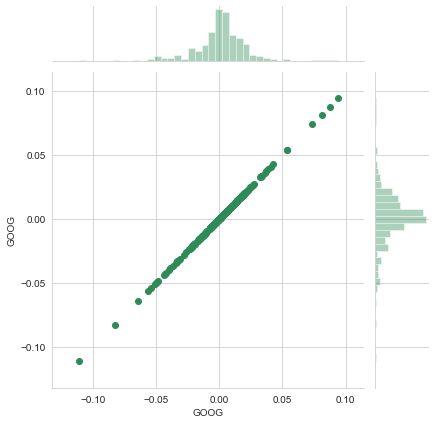

In [27]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

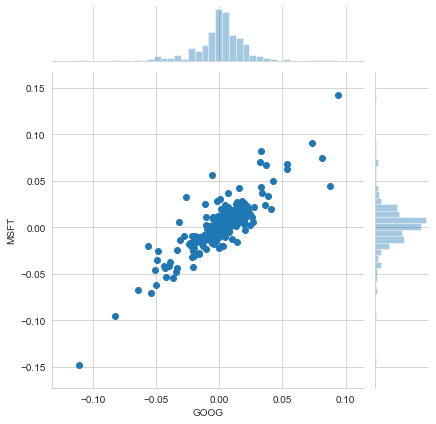

In [28]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [29]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-18,NaN,NaN,NaN,NaN
2019-09-19,-0.008125,0.005112,0.018409,0.002223
2019-09-20,-0.014618,-0.007088,-0.011555,-0.015010
2019-09-23,0.004547,0.003334,-0.002152,-0.004938
2019-09-24,-0.004755,-0.012374,-0.012649,-0.024472


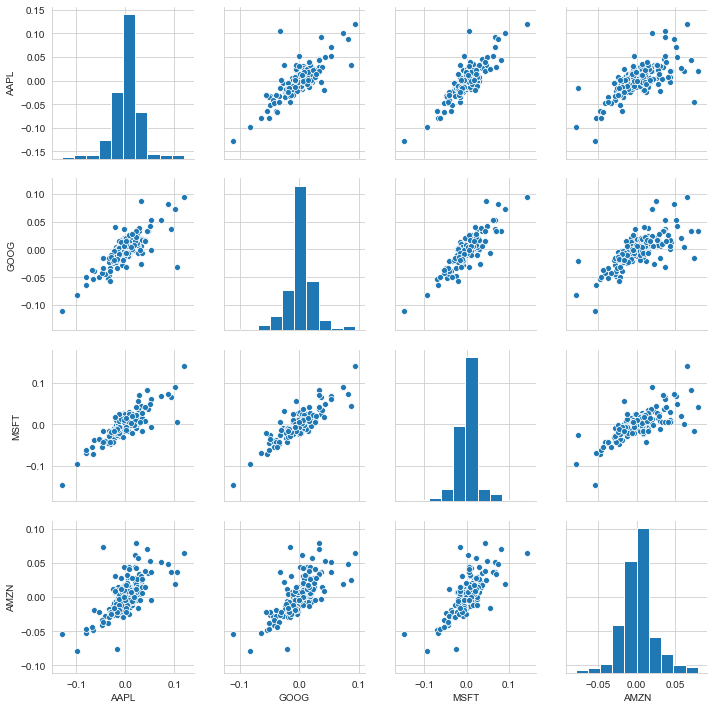

In [30]:
sns.pairplot(tech_rets.dropna())

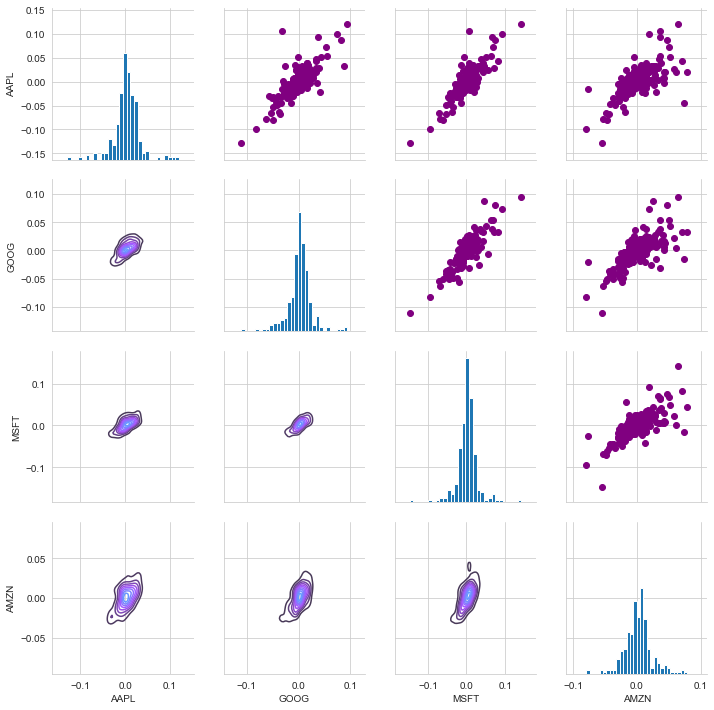

In [38]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

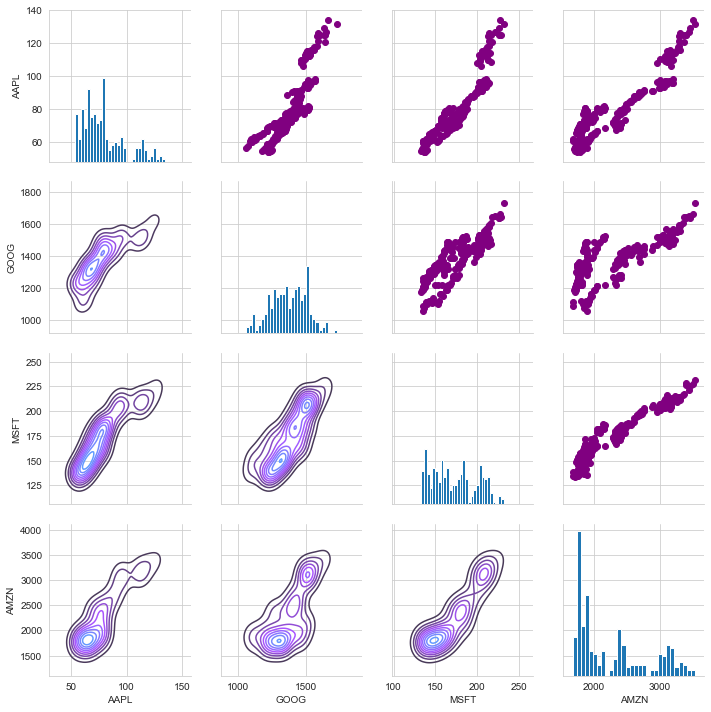

In [31]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

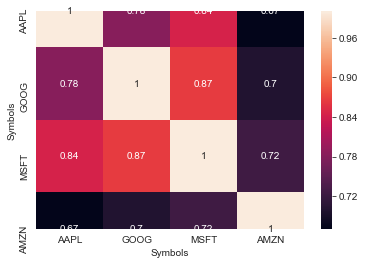

In [35]:
sns.heatmap(tech_rets.corr(),annot=True)

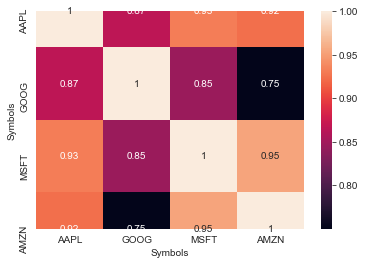

In [36]:
sns.heatmap(closing_df.corr(), annot=True)

In [37]:
# Risk analysis

In [38]:
rets = tech_rets.dropna()

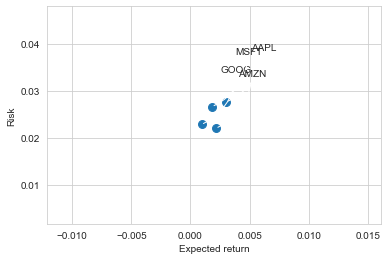

In [42]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x,y), xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

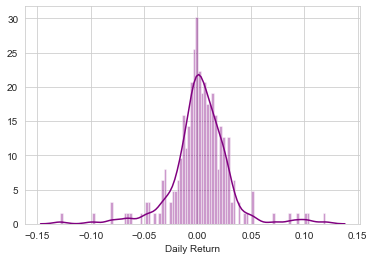

In [43]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100, color = 'purple')

In [44]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-19,-0.008125,0.005112,0.018409,0.002223
2019-09-20,-0.014618,-0.007088,-0.011555,-0.015010
2019-09-23,0.004547,0.003334,-0.002152,-0.004938
2019-09-24,-0.004755,-0.012374,-0.012649,-0.024472
2019-09-25,0.015390,0.022777,0.014413,0.015342


In [45]:
rets['AAPL'].quantile(0.05)

-0.03739927877943003

In [47]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [51]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [49]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-18,1235.609985,1216.530029,1227.510010,1232.410034,1135100,1232.410034
2019-09-19,1244.439941,1232.020020,1232.060059,1238.709961,996000,1238.709961
2019-09-20,1243.319946,1223.079956,1233.119995,1229.930054,2270000,1229.930054
2019-09-23,1239.089966,1224.170044,1226.000000,1234.030029,1062400,1234.030029
2019-09-24,1246.739990,1210.680054,1240.000000,1218.760010,1583200,1218.760010


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

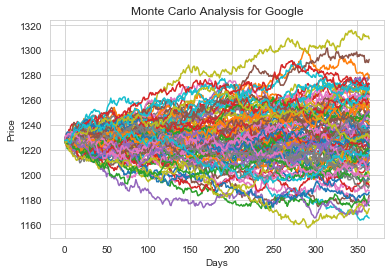

In [52]:
start_price = 1227.51

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [53]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

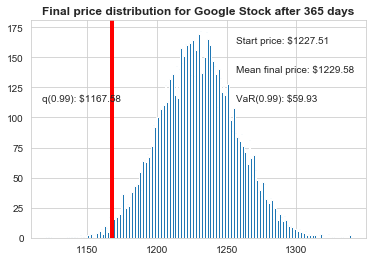

In [54]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');